In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import re

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

# Cleaning and preprocessing data

Read the original dataframe using Pandas.

In [6]:
df_all = pd.read_csv("/Users/sam/Downloads/processed_data.csv")
df_all.head()

label                                            subject  \
0      1                  Generic Cialis, branded quality@    
1      0                             Typo in /debian/README   
2      1                                   authentic viagra   
3      1                               Nice talking with ya   
4      1  or trembling; stomach cramps; trouble in sleep...   

                          email_to  \
0        the00@speedy.uwaterloo.ca   
1  debian-mirrors@lists.debian.org   
2         <the00@plg.uwaterloo.ca>   
3         opt4@speedy.uwaterloo.ca   
4     ktwarwic@speedy.uwaterloo.ca   

                                          email_from  \
0                 "Tomas Jacobs" <RickyAmes@aol.com>   
1         Yan Morin <yan.morin@savoirfairelinux.com>   
2  "Sheila Crenshaw" <7stocknews@tractionmarketin...   
3       "Stormy Dempsey" <vqucsmdfgvsg@ruraltek.com>   
4         "Christi T. Jernigan" <dcube@totalink.net>   

                                             message  
0  Content-Type: text/html;\nContent-Transfer-Enc...  
1  Hi, i've just updated from the gulus and I che...  
2  Content-Type: text/plain;\n\tcharset="iso-8859...  
3  Hey Billy, \n\nit was really fun going out the...  
4  Content-Type: multipart/alternative;\n        ...

In [11]:
# We will focus on using the content of the message from the emails in the dataframe
# We drop the "email_to" and "email_from" columns
df_all.drop(columns = ['email_to', 'email_from'], inplace=True)

We check for null values, and drop them. We also check for duplicates and drop them.

In [12]:
df_all.isnull().sum()

label         0
subject     793
message    1487
dtype: int64

In [13]:
df_all.dropna(inplace=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73211 entries, 0 to 75418
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    73211 non-null  int64 
 1   subject  73211 non-null  object
 2   message  73211 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


There are still over 70k records even after dropping null values. Check for duplicates.

In [14]:
df_all.duplicated().sum()

10847

There are many duplicate records, which are now dropped to prevent issues in training

In [15]:
df_all.drop_duplicates(inplace=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62364 entries, 0 to 75418
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    62364 non-null  int64 
 1   subject  62364 non-null  object
 2   message  62364 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


Now over 10k records were dropped as they were duplicates. Take a look at the dataframe now.

In [16]:
df_all.head(10)

label                                            subject  \
0      1                  Generic Cialis, branded quality@    
1      0                             Typo in /debian/README   
2      1                                   authentic viagra   
3      1                               Nice talking with ya   
4      1  or trembling; stomach cramps; trouble in sleep...   
5      1                                      Which is duty   
6      1                                       For Theorize   
7      1  Theorize get inside for local esc0rts who do i...   
8      1                              Losing Weight Quickly   
9      0               [R] Confidence-Intervals.... help...   

                                             message  
0  Content-Type: text/html;\nContent-Transfer-Enc...  
1  Hi, i've just updated from the gulus and I che...  
2  Content-Type: text/plain;\n\tcharset="iso-8859...  
3  Hey Billy, \n\nit was really fun going out the...  
4  Content-Type: multipart/alternative;\n        ...  
5  Content-Type: multipart/alternative;\n        ...  
6  Content-Type: text/plain;\n\tcharset="Windows-...  
7  Content-Type: Multipart/Alternative;\n  bounda...  
8  Content-Type: text/plain;\n    charset="iso-88...  
9  Hi...\n\nI have to use R to find out the 90% c...

The contents in the `message` column are quite messy and require cleaning. Several steps will be used to clean this column:
* All text will turn into lower case characters
* Rows containing 'Content-Type' will be removed as they contain huge amounts of encoded characters that cannot be efficiently cleaned.
* Replace newline characters with a space 


In [17]:
df_all['message'] = df_all['message'].apply(lambda x: x.lower())
df_all['subject'] = df_all['subject'].apply(lambda x: x.lower())
df_all.head()

label                                            subject  \
0      1                  generic cialis, branded quality@    
1      0                             typo in /debian/readme   
2      1                                   authentic viagra   
3      1                               nice talking with ya   
4      1  or trembling; stomach cramps; trouble in sleep...   

                                             message  
0  content-type: text/html;\ncontent-transfer-enc...  
1  hi, i've just updated from the gulus and i che...  
2  content-type: text/plain;\n\tcharset="iso-8859...  
3  hey billy, \n\nit was really fun going out the...  
4  content-type: multipart/alternative;\n        ...

In [18]:
# Previous size of dataframe, before removing 'Content-Type' rows
df_all.shape

(62364, 3)

In [19]:
# New size of dataframe, after removing 'Content-Type' rows 
df_all = df_all[~df_all['message'].str.contains("content-type")]
df_all.shape

(33830, 3)

In [20]:
# Replacing all \n characters with a space " "
df_all['message_clean'] = df_all['message'].apply(lambda x: re.sub('\n', ' ', x))
df_all['subject_clean'] = df_all['subject'].apply(lambda x: re.sub('\n', ' ', x))
df_all.head()

label                                   subject  \
1       0                    typo in /debian/readme   
3       1                      nice talking with ya   
9       0      [r] confidence-intervals.... help...   
16      1                                    hi man   
19      0  re: [r] confidence-intervals.... help...   

                                              message  \
1   hi, i've just updated from the gulus and i che...   
3   hey billy, \n\nit was really fun going out the...   
9   hi...\n\ni have to use r to find out the 90% c...   
16  hey billy, \n\nit was really fun going out the...   
19  hm... sounds like a homework problem to me...\...   

                                        message_clean  \
1   hi, i've just updated from the gulus and i che...   
3   hey billy,   it was really fun going out the o...   
9   hi...  i have to use r to find out the 90% con...   
16  hey billy,   it was really fun going out the o...   
19  hm... sounds like a homework problem to me... ...   

                               subject_clean  
1                     typo in /debian/readme  
3                       nice talking with ya  
9       [r] confidence-intervals.... help...  
16                                    hi man  
19  re: [r] confidence-intervals.... help...

Once we have completed these basic preprocessing steps, we drop the original subejct and message columns and keep their respective clean columns for use in text classification.

In [21]:
df = df_all.drop(columns = ['subject', 'message'])
df.head()

label                                      message_clean  \
1       0  hi, i've just updated from the gulus and i che...   
3       1  hey billy,   it was really fun going out the o...   
9       0  hi...  i have to use r to find out the 90% con...   
16      1  hey billy,   it was really fun going out the o...   
19      0  hm... sounds like a homework problem to me... ...   

                               subject_clean  
1                     typo in /debian/readme  
3                       nice talking with ya  
9       [r] confidence-intervals.... help...  
16                                    hi man  
19  re: [r] confidence-intervals.... help...

For the purposes of training, the two columns of `message_clean` and `subject_clean` can be combined to produce a column `content` that contains both the subject and message. 

In [22]:
df['content'] = df['subject_clean'] + " " + df['message_clean'] 
df.head()

label                                      message_clean  \
1       0  hi, i've just updated from the gulus and i che...   
3       1  hey billy,   it was really fun going out the o...   
9       0  hi...  i have to use r to find out the 90% con...   
16      1  hey billy,   it was really fun going out the o...   
19      0  hm... sounds like a homework problem to me... ...   

                               subject_clean  \
1                     typo in /debian/readme   
3                       nice talking with ya   
9       [r] confidence-intervals.... help...   
16                                    hi man   
19  re: [r] confidence-intervals.... help...   

                                              content  
1   typo in /debian/readme hi, i've just updated f...  
3   nice talking with ya hey billy,   it was reall...  
9   [r] confidence-intervals.... help... hi...  i ...  
16  hi man hey billy,   it was really fun going ou...  
19  re: [r] confidence-intervals.... help... hm......

In [23]:
file_name = "cleaned_data.csv"
# Save the DataFrame to a CSV file in the current directory
df.to_csv(file_name, index=False)

print(f"File saved as {file_name}")


File saved as cleaned_data.csv


# Exploring the dataset 

The final dataset can be explored to look at the text inside the messages and subject lines. We use a word cloud to visualise the most common words in the message and subject lines for both spam (1) and ham (0) categories.

In [24]:
from wordcloud import WordCloud

(-0.5, 1599.5, 799.5, -0.5)

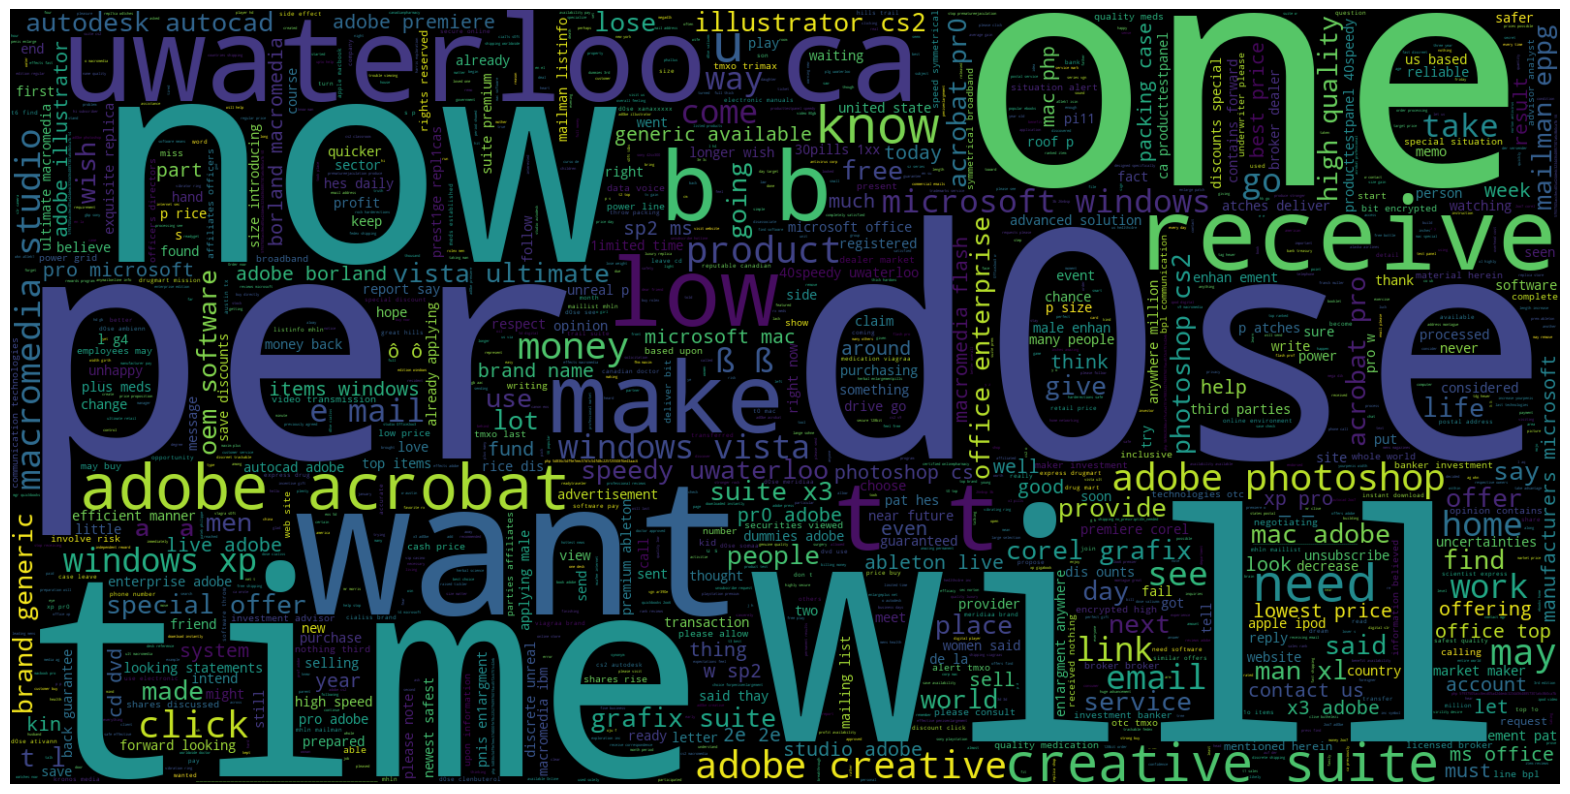

In [21]:
# Word cloud for spam messages
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 1].message_clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

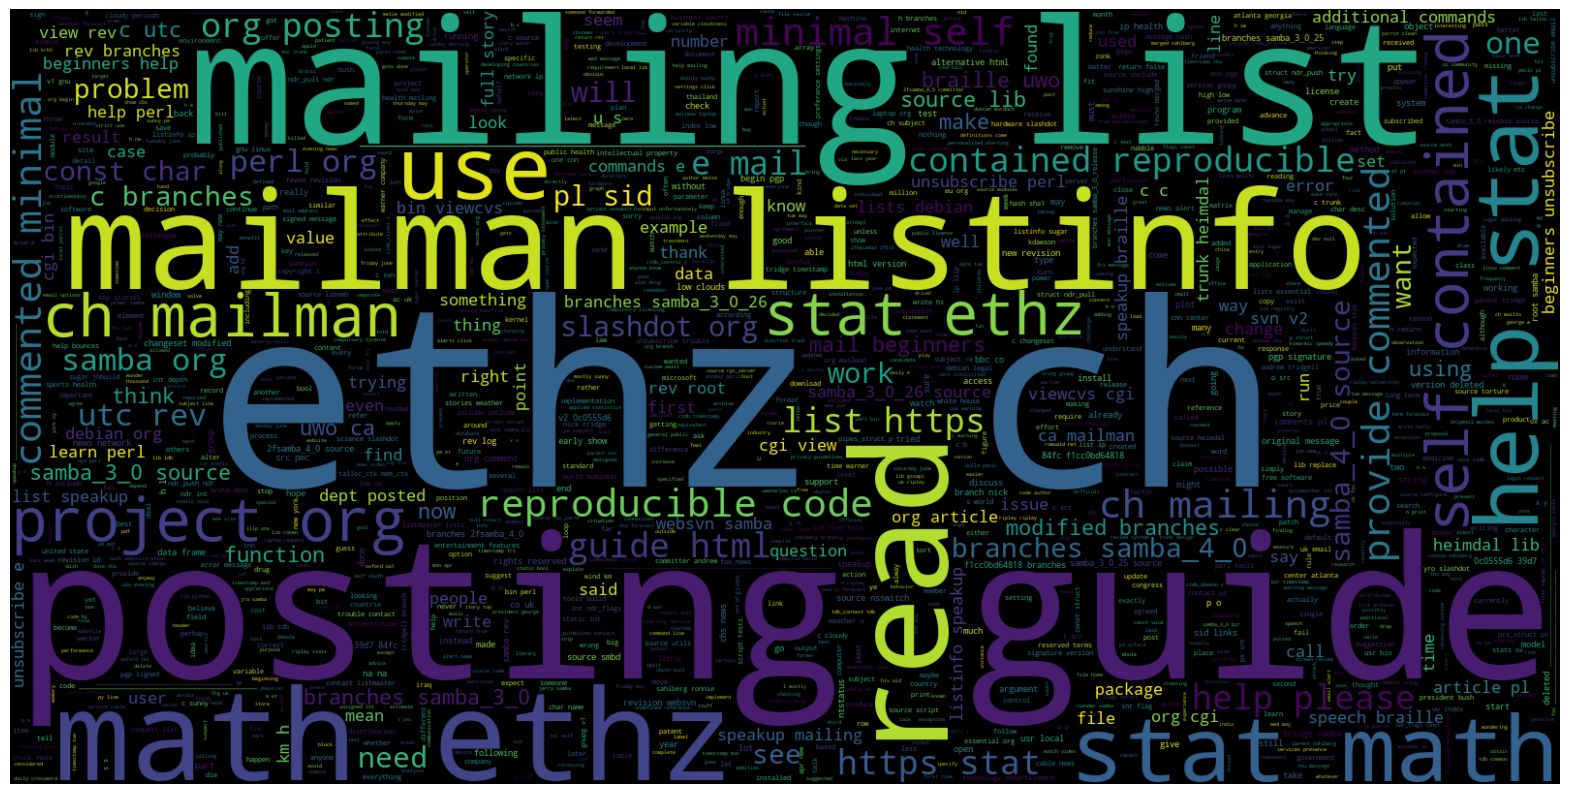

In [22]:
# Word cloud for not spam messages
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 0].message_clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

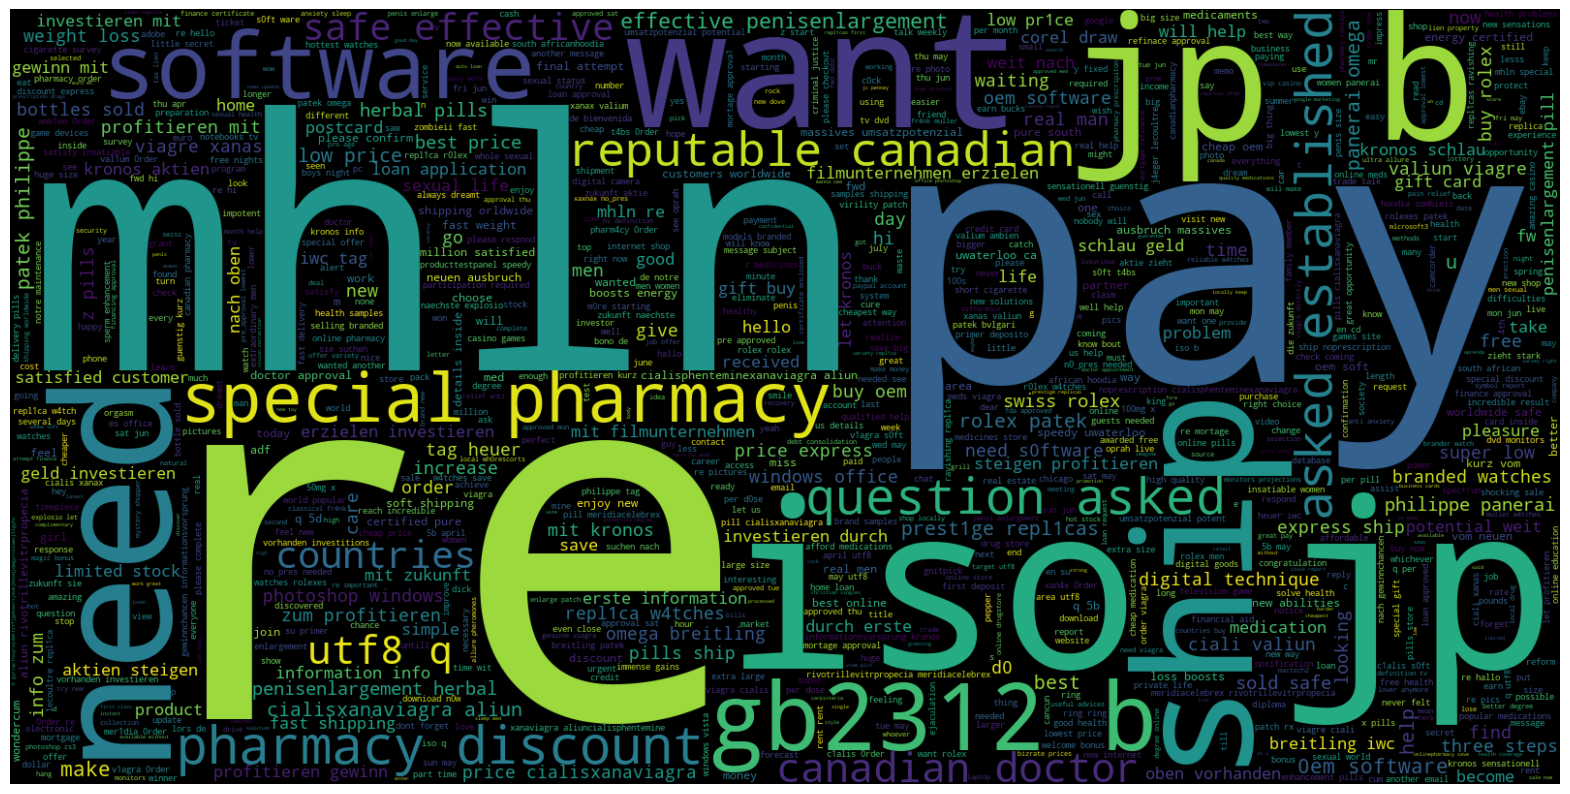

In [23]:
# Word cloud for spam subjects
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 1].subject_clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

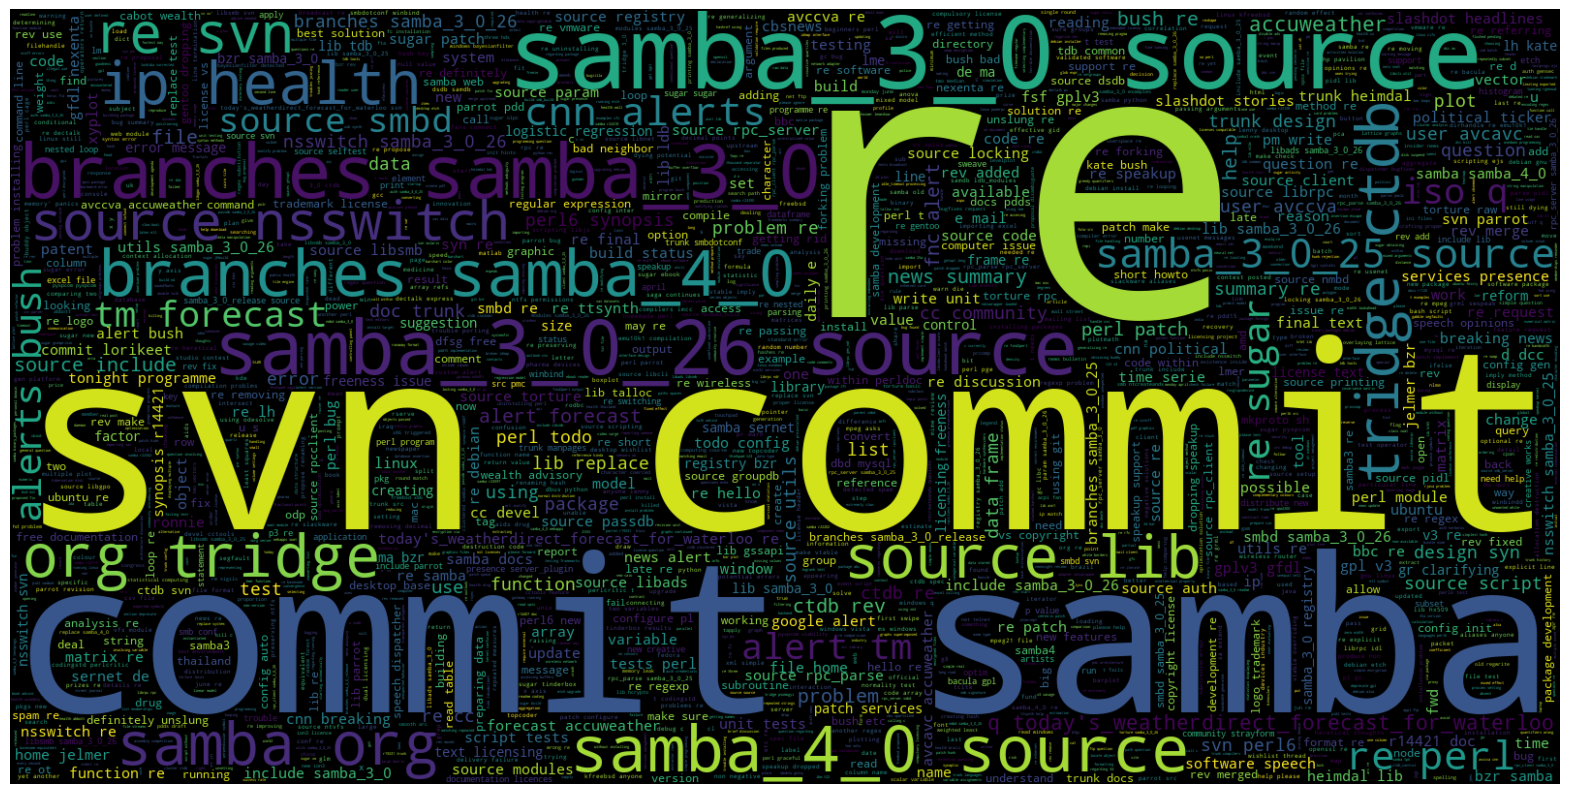

In [24]:
# Word cloud for not spam subjects
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 0].subject_clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

We can see that there while there are some words in the spam messages and subject lines that overlap with the not-spam messages and subject lines, the most common words are quite different between the two classes. An interesting feature noted was that many spam emails use "Re:" in the subject line to try and trick the user that this is an email they have already responded to before. It is so common that "re" itself shows up quite largely in the spam word cloud!

In [25]:
# Creating a dataset used for EDA; avoid overwriting
df_exp = df.copy()

In [26]:
import string 
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

In [27]:
df_exp['msg_len'] = df_exp.message_clean.apply(lambda x: len(x))
df_exp['sub_len'] = df_exp.subject_clean.apply(lambda x: len(x))
df_exp['msg_punc'] = df_exp.message_clean.apply(lambda x: count(x, string.punctuation))
df_exp['sub_punc'] = df_exp.subject_clean.apply(lambda x: count(x, string.punctuation))
df_exp['msg_letters'] = df_exp.message_clean.apply(lambda x: count(x, string.ascii_letters))
df_exp['msg_numbers'] = df_exp.message_clean.apply(lambda x: count(x, string.digits))
df_exp['sub_letters'] = df_exp.subject_clean.apply(lambda x: count(x, string.ascii_letters))
df_exp['sub_numbers'] = df_exp.subject_clean.apply(lambda x: count(x, string.digits))
df_exp.head()

# df['count_punct'] = df.content.apply(lambda s: count(s, string.punctuation))
# str.count : df['comma_count'] = df.string_column.str.count(',')

label                                      message_clean  \
1       0  hi, i've just updated from the gulus and i che...   
3       1  hey billy,   it was really fun going out the o...   
9       0  hi...  i have to use r to find out the 90% con...   
16      1  hey billy,   it was really fun going out the o...   
19      0  hm... sounds like a homework problem to me... ...   

                               subject_clean  \
1                     typo in /debian/readme   
3                       nice talking with ya   
9       [r] confidence-intervals.... help...   
16                                    hi man   
19  re: [r] confidence-intervals.... help...   

                                              content  msg_len  sub_len  \
1   typo in /debian/readme hi, i've just updated f...      728       22   
3   nice talking with ya hey billy,   it was reall...      649       20   
9   [r] confidence-intervals.... help... hi...  i ...      990       36   
16  hi man hey billy,   it was really fun going ou...      649        6   
19  re: [r] confidence-intervals.... help... hm......     1162       40   

    msg_punc  sub_punc  msg_letters  msg_numbers  sub_letters  sub_numbers  
1         52         2          564           10           18            0  
3         25         0          483            3           17            0  
9        116        10          714           23           24            0  
16        25         0          483            3            5            0  
19       139        11          821           13           26            0

In [28]:
df_exp['label'] = df_exp['label'].astype("category")
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33830 entries, 1 to 75417
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   label          33830 non-null  category
 1   message_clean  33830 non-null  object  
 2   subject_clean  33830 non-null  object  
 3   content        33830 non-null  object  
 4   msg_len        33830 non-null  int64   
 5   sub_len        33830 non-null  int64   
 6   msg_punc       33830 non-null  int64   
 7   sub_punc       33830 non-null  int64   
 8   msg_letters    33830 non-null  int64   
 9   msg_numbers    33830 non-null  int64   
 10  sub_letters    33830 non-null  int64   
 11  sub_numbers    33830 non-null  int64   
dtypes: category(1), int64(8), object(3)
memory usage: 3.1+ MB


In [29]:
#Descriptive stats of the not-spam records
df_exp[df_exp['label'] == 0].describe()

msg_len       sub_len       msg_punc      sub_punc  \
count   20333.000000  20333.000000   20333.000000  20333.000000   
mean     2188.275414     46.930704     286.814833      4.479565   
std      6019.483730     34.127598     977.035068      5.206510   
min        11.000000      3.000000       0.000000      0.000000   
25%       757.000000     28.000000      74.000000      2.000000   
50%      1221.000000     41.000000     150.000000      3.000000   
75%      2195.000000     60.000000     273.000000      6.000000   
max    671952.000000   1290.000000  100490.000000    135.000000   

         msg_letters   msg_numbers   sub_letters   sub_numbers  
count   20333.000000  20333.000000  20333.000000  20333.000000  
mean     1426.905572     86.345104     34.635224      1.844194  
std      4017.813575    367.943907     24.167954      3.967966  
min         8.000000      0.000000      1.000000      0.000000  
25%       488.000000      9.000000     21.000000      0.000000  
50%       810.000000     27.000000     31.000000      0.000000  
75%      1407.000000     73.000000     43.000000      3.000000  
max    471476.000000  21674.000000   1054.000000     89.000000

In [30]:
#Descriptive stats of the spam records
df_exp[df_exp['label'] == 1].describe()

msg_len       sub_len      msg_punc      sub_punc    msg_letters  \
count   13497.000000  13497.000000  13497.000000  13497.000000   13497.000000   
mean      994.537082     40.031637     56.611321      1.930948     702.416092   
std      2175.096508     33.505493    102.613387      3.160727    1665.085213   
min         1.000000      1.000000      0.000000      0.000000       0.000000   
25%       334.000000     20.000000     15.000000      0.000000     225.000000   
50%       645.000000     32.000000     31.000000      1.000000     444.000000   
75%      1240.000000     51.000000     68.000000      2.000000     910.000000   
max    141935.000000    755.000000   4045.000000     58.000000  111912.000000   

        msg_numbers   sub_letters   sub_numbers  
count  13497.000000  13497.000000  13497.000000  
mean      35.234200     31.076684      1.456250  
std       86.010645     25.729012      4.550875  
min        0.000000      0.000000      0.000000  
25%        3.000000     16.000000      0.000000  
50%       11.000000     25.000000      0.000000  
75%       35.000000     39.000000      1.000000  
max     4499.000000    334.000000    208.000000

We can see that numerically, the features between the two classes are quite different. This can be visualised further using KDE plots.

In [27]:
import seaborn as sns 

<Axes: xlabel='sub_numbers', ylabel='Density'>

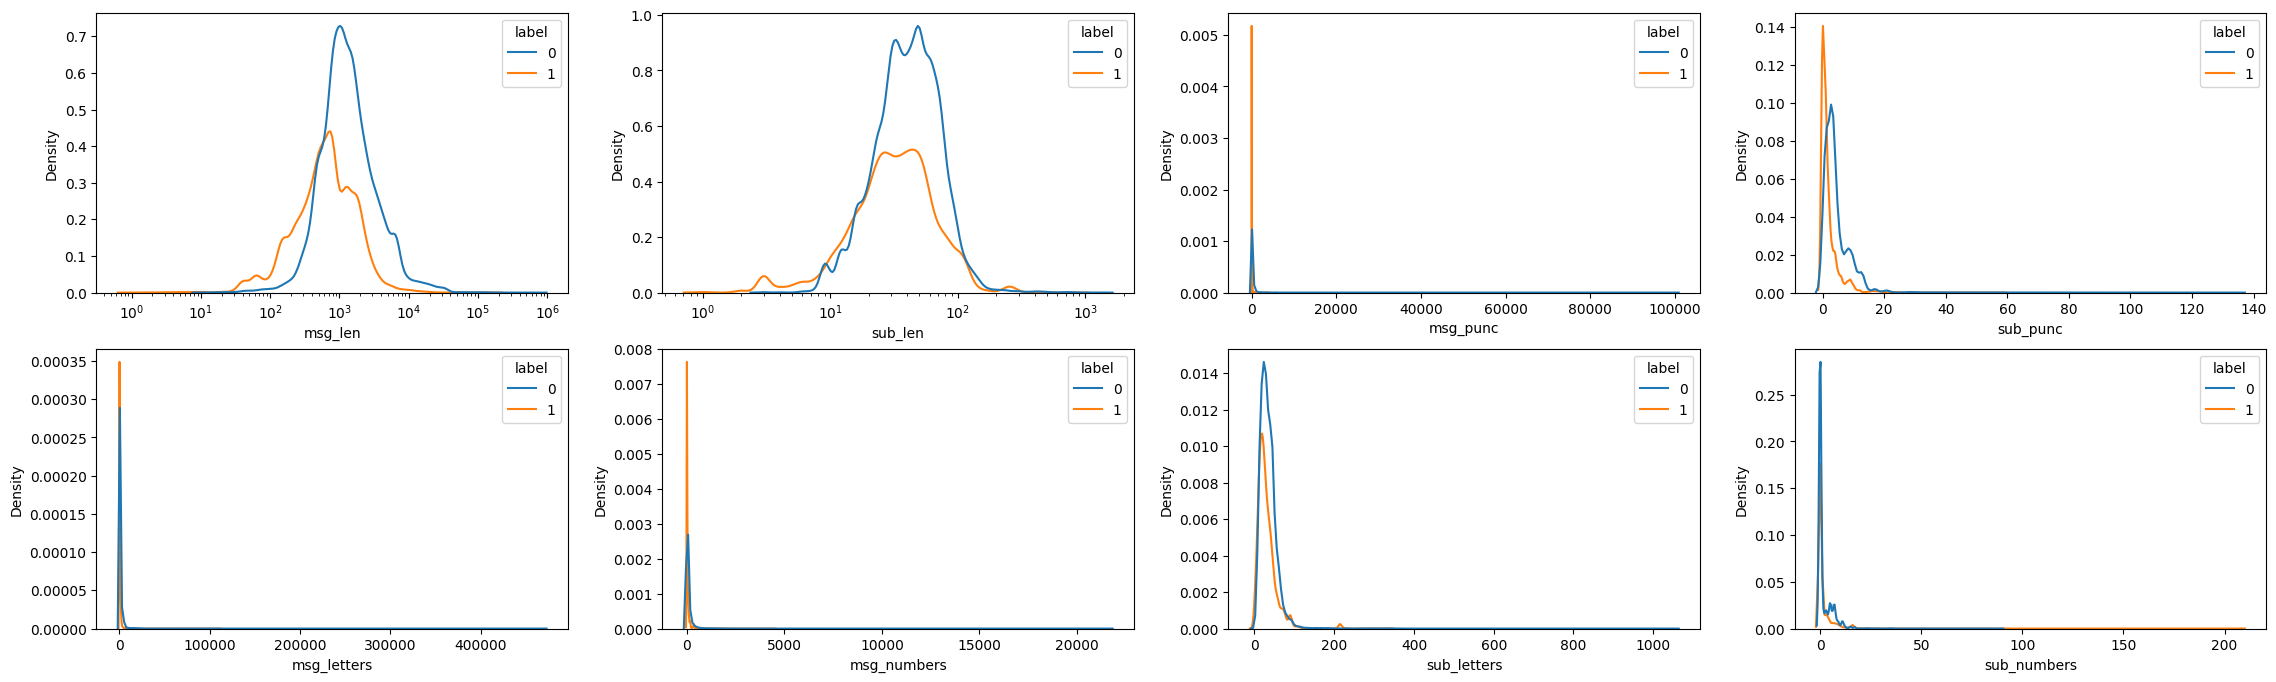

In [32]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (28,8))
sns.kdeplot(data=df_exp, x="msg_len", hue="label", ax=axes[0][0], log_scale=True)
sns.kdeplot(data=df_exp, x="sub_len", hue="label", ax=axes[0][1], log_scale=True)
sns.kdeplot(data=df_exp, x="msg_punc", hue="label", ax=axes[0][2])
sns.kdeplot(data=df_exp, x="sub_punc", hue="label", ax=axes[0][3])
sns.kdeplot(data=df_exp, x="msg_letters", hue="label", ax=axes[1][0])
sns.kdeplot(data=df_exp, x="msg_numbers", hue="label", ax=axes[1][1])
sns.kdeplot(data=df_exp, x="sub_letters", hue="label", ax=axes[1][2])
sns.kdeplot(data=df_exp, x="sub_numbers", hue="label", ax=axes[1][3])

In [33]:
df_exp[df_exp['msg_letters'] == 0].head()

label                                      message_clean  \
51        1  ×ð¾´µä¹ó¹«ë¾áìµ¼/²æîñ£ºäúºã£¡     îòêçéîã¯£¨éî...   
8481      1  äúºã£¡ ¡¡¡¡ ¡¡¡¡±¾¹«ë¾³éá¢¶àäêóð×åá¼ºãµäéç»á¹ø...   
11104     1  ïèéúäúºã£ºîòë¾óå»ý´ú¿ª½¨öþ°²×°¡¢æû³µðþàí¡¢ôëêä...   
16828     1  ·ð  é½  êð  ìú  ïè  êµ  òµ  óð  ïþ  ¹«  ë¾    ...   
16898     1  ×ð¾´µä¸ºôðèë£¨¾­àí£¯²æîñ£©äúºã£¡          ±¾¹«...   

                       subject_clean  \
51     =?gb2312?b?sk7wrrzso6gjoq==?=   
8481       =?gb2312?b?xvpstc+y0by=?=   
11104      =?gb2312?b?tpq/qreixre=?=   
16828      =?gb2312?b?0rxo8ceiycwh?=   
16898      =?gb2312?b?xvpstddfz6i=?=   

                                                 content  msg_len  sub_len  \
51     =?gb2312?b?sk7wrrzso6gjoq==?= ×ð¾´µä¹ó¹«ë¾áìµ¼...      685       29   
8481   =?gb2312?b?xvpstc+y0by=?= äúºã£¡ ¡¡¡¡ ¡¡¡¡±¾¹«...      440       25   
11104  =?gb2312?b?tpq/qreixre=?= ïèéúäúºã£ºîòë¾óå»ý´ú...      184       25   
16828  =?gb2312?b?0rxo8ceiycwh?= ·ð  é½  êð  ìú  ïè  ...     1213       25   
16898  =?gb2312?b?xvpstddfz6i=?= ×ð¾´µä¸ºôðèë£¨¾­àí£¯...      862       25   

       msg_punc  sub_punc  msg_letters  msg_numbers  sub_letters  sub_numbers  
51            4         8            0           13           15            6  
8481          1         8            0           11           12            5  
11104         0         8            0           23           13            4  
16828       109         6            0           34           13            6  
16898         3         7            0           11           13            5

In [34]:
#It seems that there are messages that do not contain characters that are readable. 
# We can remove these from the dataset as well.
drop_idx = df_exp[df_exp['msg_letters'] == 0].index.tolist()
df_exp.drop(index = drop_idx, inplace=True)

In [35]:
print(drop_idx)
print(df.shape)

[51, 8481, 11104, 16828, 16898, 17249, 19528, 20917, 21641, 22898, 23606, 23719, 23742, 25674, 26101, 28204, 28643, 29065, 31653, 33486, 36415, 36659, 37836, 37898, 38651, 38806, 44063, 46184, 48517, 48807, 50391, 52594, 53719, 55253, 59023, 60890, 61794, 61934, 63502, 66530, 69224, 70118, 75270]
(33830, 4)


In [36]:
df.drop(index = drop_idx, inplace=True)
print(df.shape)

(33787, 4)


<Axes: xlabel='sub_numbers', ylabel='Density'>

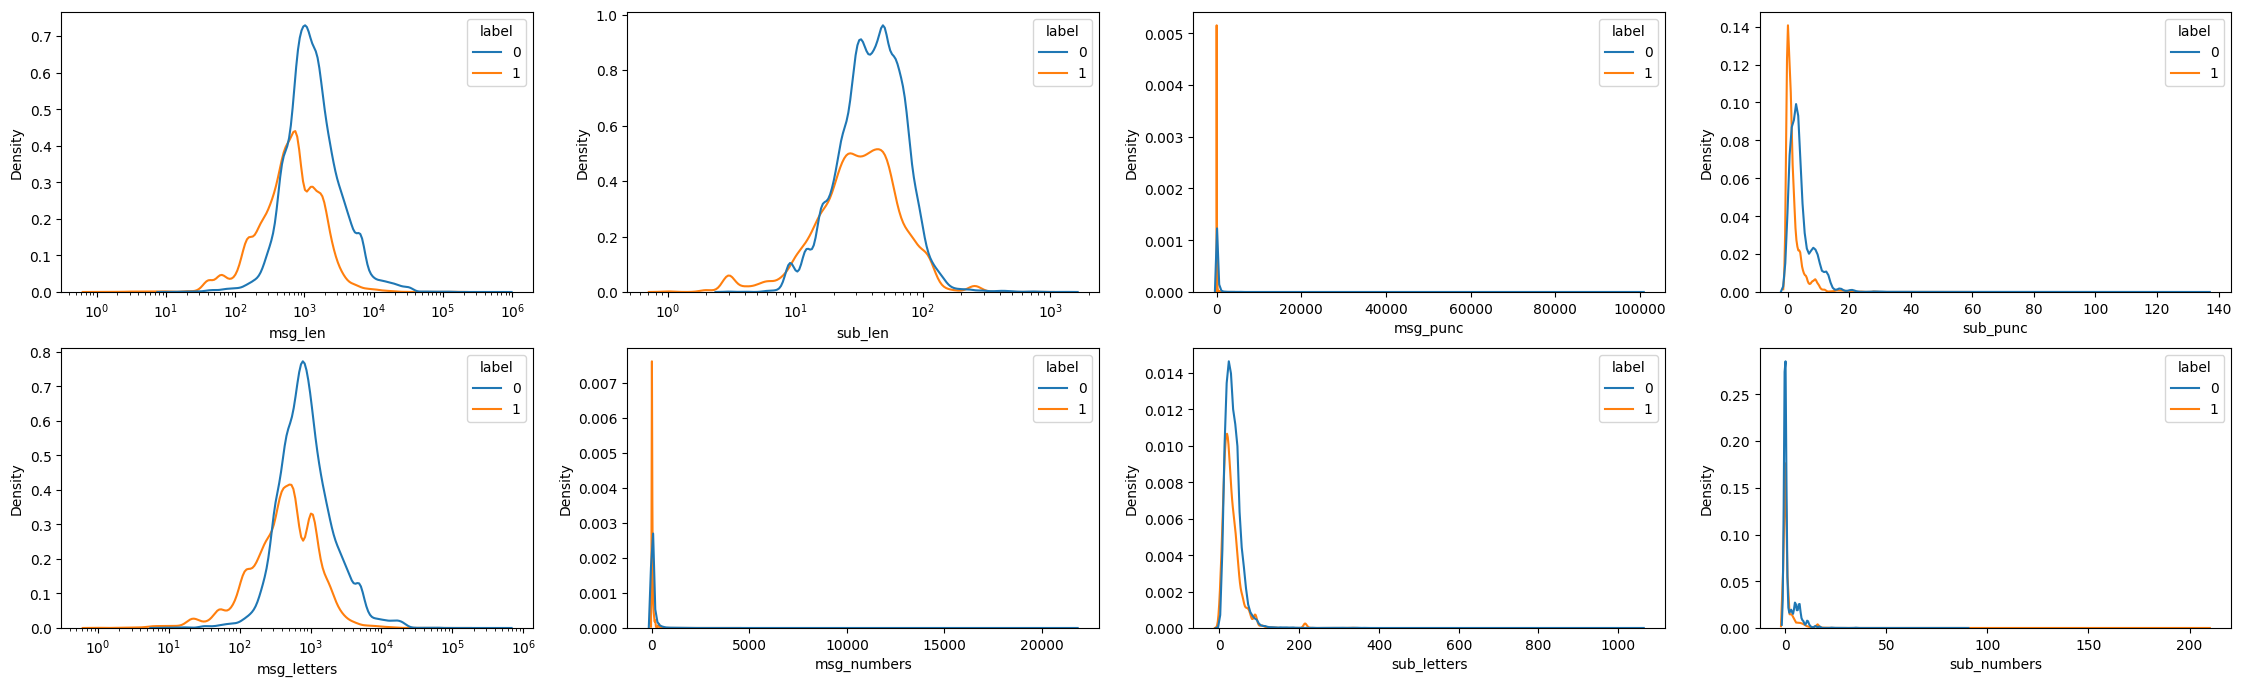

In [37]:
#New distrubution after dropping rows with no ascii characters
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (28,8))
sns.kdeplot(data=df_exp, x="msg_len", hue="label", ax=axes[0][0], log_scale=True)
sns.kdeplot(data=df_exp, x="sub_len", hue="label", ax=axes[0][1], log_scale=True)
sns.kdeplot(data=df_exp, x="msg_punc", hue="label", ax=axes[0][2])
sns.kdeplot(data=df_exp, x="sub_punc", hue="label", ax=axes[0][3])
sns.kdeplot(data=df_exp, x="msg_letters", hue="label", ax=axes[1][0], log_scale=True)
sns.kdeplot(data=df_exp, x="msg_numbers", hue="label", ax=axes[1][1])
sns.kdeplot(data=df_exp, x="sub_letters", hue="label", ax=axes[1][2])
sns.kdeplot(data=df_exp, x="sub_numbers", hue="label", ax=axes[1][3])

**Findings:**

* There is significant overlap in the distributions between the numerical features of the messages and subjects, and would likely make differentiating them without using their textual contexts very difficult.
* There is a very wide distribution in message and subject length, punctuation counts, and the number of ASCII letters and numbers across both classes of emails. The vast majority of message lengths are concentrated are around 1000 in character length; whilst the majority of email subject line are between 100 to 1000 in characters in length.
* Punctuation and numeric characters have a very wide range, but are concentrated on the lower end for both classes (for both message and subject).



---




# Preparation for Model Training - Machine Learning Methods
We will use NLP preprocessing steps to prepare the textual data in a way that will allow it to be used to train some basic machine learning models. We will create several classification models to train and test the data we have used. 

Note that a small fraction of the entire dataset will be used in lieu of the entire dataset itself. This is because huge dataset sizes can be inefficient to train in a time-effective manner. 

We will use the contents of the `message_clean` column as the solve X-variable, though using the combined `content` column is also possible. The `message_clean` column is chosen for the sake of efficiency in training, as longer strings will later require much more computational power when implementing an LSTM.

In [28]:
dfml = df.sample(frac=0.15)
dfml.shape

(5074, 4)

We will use 15% of the entire dataframe for the dataset of the ML model. More or less can be taken by changing the fraction in the above code block. A small sample is taken due to limited computational resources.

Since we are only using the `message_clean` column for the X variables, we can drop the two other columns `subject_clean` and `content`. Note that any of these three columns could be used to conduct the same text classification and their results can be compared.

In [29]:
# Understand the ratio of data 
dfml.label.value_counts(normalize=True) * 100

label
0    60.760741
1    39.239259
Name: proportion, dtype: float64

The dataset consists of about 40% of spam emails, and the remaining 60% are not spam. This is not too imbalanced so dataset balancing methods will not be used.

We will use stemming and remove stop words from the text in `message_clean`. After this, we will use `TfidfVectorizer` to vectorize the textual data.

In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [31]:
port_stem = PorterStemmer()

In [33]:
def stemming(content):
    remove_punc_content = re.sub('[^0-9a-zA-Z]+', ' ', content)
    split_content = remove_punc_content.split()
    stemmed_content = [port_stem.stem(word) for word in split_content if word not in stopwords.words('english')]
    joined_stemmed = ' '.join(stemmed_content)
    return joined_stemmed

In [34]:
dfml.drop(columns = ['subject_clean', 'content'], inplace=True)

In [35]:
dfml['message_clean_stem'] = dfml['message_clean'].apply(stemming)
dfml.head()

label                                      message_clean  \
8621       1  changed remember different but pray times. pri...   
25566      0  nothing! my mistake! gsub -- not sub -- is wha...   
51841      0  on tue, 5 jun 2007, dan williams wrote:  > on ...   
8720       0  on mon jul 10 17:25:13 2006, chip wrote: > par...   
53671      0  on fri, 8 jun 2007, m. jankowski wrote:  > thi...   

                                      message_clean_stem  
8621   chang rememb differ pray time prison thu tri b...  
25566  noth mistak gsub sub want get em bert bert gun...  
51841  tue 5 jun 2007 dan william wrote tue 2007 06 0...  
8720   mon jul 10 17 25 13 2006 chip wrote parrot def...  
53671  fri 8 jun 2007 jankowski wrote first post requ...

In [36]:
# Get the X and y values
X = dfml['message_clean_stem'].values
y = dfml['label'].values

In [37]:
print(X[0])

chang rememb differ pray time prison thu tri besid us healthcar inc fda approv onlin store care health men health cialistadalafil viagra100mg viagra50mg viagrasofttab tadalafilsofttab propecia leviitra anti depress anti anxieti valiunxanax ambiem zoloft sertralin hcl atarax zyban bupropion hcl ativaan pain relief muscl relax carisoma carisoprodol ultran anti diabet glucophag weight loss lipitor atorvastatin meriiidia sibutramin zocor blood pressur choleserrol norvasc product list clickher taken girl fascin central wood mistress forth strang grave across friend arm respect sandwich fire


In [38]:
print(y)

[1 0 0 ... 1 0 1]


In [39]:
# Vectorize the text using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.fit_transform(X)

In [40]:
X.shape

(5074, 45736)

In [41]:
print(X[0])
print(type(X))
print(X.shape)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 76 stored elements and shape (1, 45736)>
  Coords	Values
  (0, 14073)	0.05087585294592257
  (0, 35835)	0.07725534975163012
  (0, 17135)	0.05723286144861807
  (0, 33894)	0.11176731423462855
  (0, 41294)	0.040853478485593495
  (0, 34131)	0.09703519607787195
  (0, 41207)	0.06733818158227149
  (0, 41859)	0.045544217882333926
  (0, 11990)	0.09746469727214097
  (0, 43002)	0.04637451402301352
  (0, 22729)	0.10083117877206241
  (0, 24335)	0.059788088011613345
  (0, 19921)	0.10576672042373432
  (0, 10561)	0.07555172567374055
  (0, 31587)	0.05866811177299779
  (0, 39606)	0.06813085418081836
  (0, 13581)	0.07017090979762206
  (0, 22728)	0.13553166254288035
  (0, 28769)	0.06510389346578703
  (0, 14367)	0.1346895061222332
  (0, 43606)	0.1346895061222332
  (0, 43607)	0.1346895061222332
  (0, 43609)	0.1346895061222332
  (0, 40392)	0.1346895061222332
  (0, 34309)	0.12128088343364979
  :	:
  (0, 28823)	0.1346895061222332
  (0, 38131)	0.13468

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state=0,
                                                   stratify=y)

## Logistic Regression Classification Model

We will make a logistic regression model as the first of the machine learning models to classify the text as spam or not spam. 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [44]:
LR_model = LogisticRegression()

In [45]:
LR_model.fit(X_train, y_train)

LogisticRegression()

In [46]:
LR_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [47]:
LR_ypred = LR_model.predict(X_test)

In [48]:
def evalmetrics(ytest, ypred):
    acc = accuracy_score(ytest, ypred) * 100
    print(classification_report(ytest, ypred))
    print('\n', 'Accuracy = {:0.2f}%.'.format(acc))
    ConfusionMatrixDisplay.from_predictions(ytest, ypred)
    return 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       617
           1       0.99      0.99      0.99       398

    accuracy                           0.99      1015
   macro avg       0.99      0.99      0.99      1015
weighted avg       0.99      0.99      0.99      1015


 Accuracy = 99.21%.


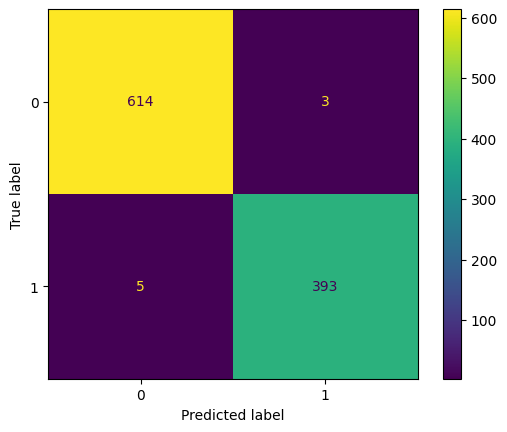

In [49]:
# Evaulating the performance of the Logistic Regression model
evalmetrics(y_test, LR_ypred)

## Naive Bayes Classification Model

In [50]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB().fit(X_train, y_train)

In [51]:
NB_model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [52]:
NB_ypred = NB_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       617
           1       1.00      0.90      0.95       398

    accuracy                           0.96      1015
   macro avg       0.97      0.95      0.96      1015
weighted avg       0.96      0.96      0.96      1015


 Accuracy = 96.16%.


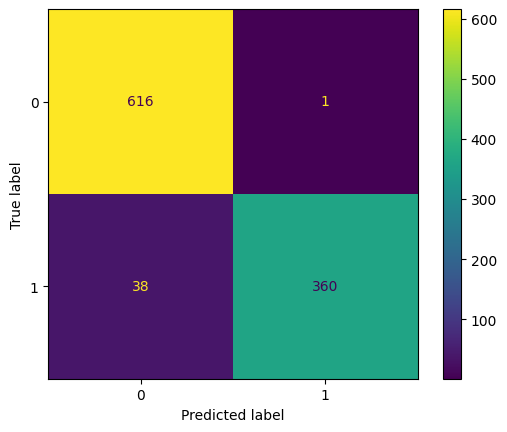

In [53]:
evalmetrics(y_test, NB_ypred)

### Support Vector Machine Classification Model

In [54]:
from sklearn.svm import SVC
SVC_model = SVC()

In [55]:
SVC_model.fit(X_train, y_train)

SVC()

In [56]:
SVC_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [57]:
SVC_ypred = SVC_model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       617
           1       0.99      0.99      0.99       398

    accuracy                           0.99      1015
   macro avg       0.99      0.99      0.99      1015
weighted avg       0.99      0.99      0.99      1015


 Accuracy = 99.41%.


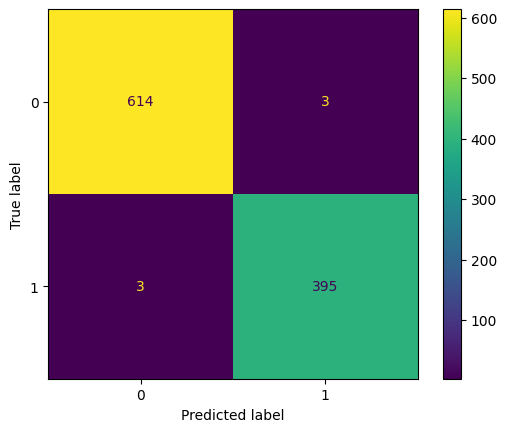

In [58]:
evalmetrics(y_test, SVC_ypred)

## Results from Machine Learning 

The results demonstrate that machine learning models are able to distinguish and classify emails as spam or not spam at a high level of accuracy. The best performing method was the Support Vector Classifier at 99.31% accuracy, whilst the Logistic Regression also provided 98.92% accuracy. Naive Bayes performed just marginally poorer at 96.65%, but is still a very high level of accuracy.

# Deep Learning Methods

Despite the very high level of accuracy achieved by common machine learning classification models, one might be interested in attempting to build a classification model using neural networks. For this section of the project, a very simple artificial neural network (ANN) will be created, as well as an LSTM. Note that the computational time is significantly higher for an LSTM, and it could potentially be difficult to optimise these networks as well without access to GPU/CPU. 

## Artificial Neural Network (ANN) Classifier

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

We will continue to use the cleaned and stemmed message column (`message_clean_stem`) from the dataframe `dfml` for this section of the project. We will re-initialise the `X` and `y` values, as they will be processed in a different way using `CountVectorizer` instead. 

In [60]:
dfml.head()

label                                      message_clean  \
8621       1  changed remember different but pray times. pri...   
25566      0  nothing! my mistake! gsub -- not sub -- is wha...   
51841      0  on tue, 5 jun 2007, dan williams wrote:  > on ...   
8720       0  on mon jul 10 17:25:13 2006, chip wrote: > par...   
53671      0  on fri, 8 jun 2007, m. jankowski wrote:  > thi...   

                                      message_clean_stem  
8621   chang rememb differ pray time prison thu tri b...  
25566  noth mistak gsub sub want get em bert bert gun...  
51841  tue 5 jun 2007 dan william wrote tue 2007 06 0...  
8720   mon jul 10 17 25 13 2006 chip wrote parrot def...  
53671  fri 8 jun 2007 jankowski wrote first post requ...

In [62]:
messages = dfml['message_clean_stem'].values
y = dfml['label'].values

In [63]:
messages_train, messages_test, y_train, y_test = train_test_split(messages, y,
                                                                 test_size = 0.2,
                                                                 random_state=0,
                                                                 stratify=y)

In [64]:
countVectorizer = CountVectorizer() #has lots of parameters we could use, max/min_df; n_gram, stop_words
countVectorizer.fit(messages_train)
X_train = countVectorizer.transform(messages_train)
X_test = countVectorizer.transform(messages_test)
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 385294 stored elements and shape (4059, 39928)>

In [65]:
#Check types of each train and test
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


You may run into a problem trying to use a sparse matrix as an input into the neural network. We change it into a numpy array beforehand.

In [66]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [67]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4059, 39928) (4059,) (1015, 39928) (1015,)


In [68]:
from keras.models import Sequential
from keras import layers

2025-01-24 01:08:48.183335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [69]:
input_dim = X_train.shape[1]

In [70]:
X_train.shape

(4059, 39928)

In [71]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

/Users/sam/anaconda3/envs/Data_Science/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │       399,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,301 (1.52 MB)

 Trainable params: 399,301 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
history = model.fit(X_train, y_train,
                    epochs = 20,
                    verbose = False,
                    validation_data = (X_test, y_test),
                    batch_size = 1000)

In [74]:
loss, accuracy = model.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9995
Testing Accuracy:  0.9931


In [77]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

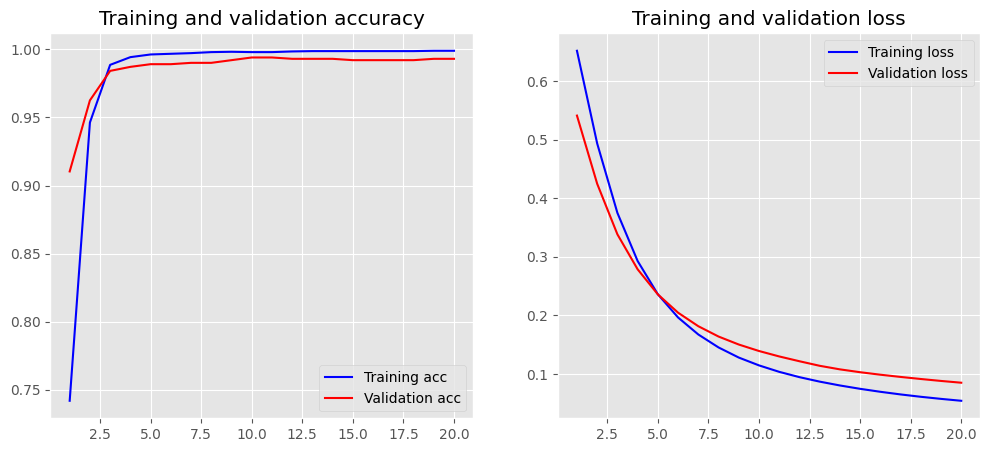

In [78]:
plot_history(history)

## Results from ANN Classification model

The results demonstrate that a very simple artificial neural network is capable of achieving very high accuracy, with a training accuracy of 99.98% and a testing accuracy of 99.21%. This is model could be further developed to include dropout layers and additional layers to improve it further. There is still a risk of model overfitting or not being highly generalisable. 

## LSTM Classification Model

In addition to the ANN, another deep learning model know as an LSTM is used to create another classification model. Before we start building the LSTM, it is important to understand some of the characteristics of our textual data to make better informed choices to the parameters used within the LSTM. 

In [89]:
pip install keras-preprocessing


Note: you may need to restart the kernel to use updated packages.


In [79]:
import tensorflow as tf
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [80]:
dfml_exp = dfml.copy()

In [81]:
dfml_exp['approx_word_count'] = dfml_exp['message_clean_stem'].apply(lambda x: count(x, ' '))
dfml_exp.describe()

label  approx_word_count
count  5074.000000        5074.000000
mean      0.392393         188.198266
std       0.488331         392.917960
min       0.000000           0.000000
25%       0.000000          57.000000
50%       0.000000         107.000000
75%       1.000000         199.750000
max       1.000000       15048.000000

In [82]:
dfml_exp[dfml_exp['approx_word_count'] < 525].count()

label                 4782
message_clean         4782
message_clean_stem    4782
approx_word_count     4782
dtype: int64

For this fraction of the dataset that was taken, we find there are approximately 191 words (denoted by the number of spaces found in the emails). About 93% of the emails contain 525 or fewer spaces, which indicates there are typically less than 525 words long at most. This information can be used to set the maximum sequence length for the LSTM.

LSTM will use a different preprocessing step, which will not only remove all punctuation and non-alphanumeric characters, but also remove links and emails inside the message contents. This is done below.

In [83]:
stop_words = stopwords.words('english')
snow_stem = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [84]:
def text_cleaning(text):
    text = re.sub(text_cleaning_re, ' ', str(text)).strip()
    split_content = text.split()
    stemmed_content = [snow_stem.stem(word) for word in split_content if word not in stopwords.words('english')]
    joined_stemmed = ' '.join(stemmed_content)
    return joined_stemmed

In [85]:
dfml['message_clean_stem_dl'] = dfml['message_clean'].apply(lambda x: text_cleaning(x))
dfml.head()

label                                      message_clean  \
8621       1  changed remember different but pray times. pri...   
25566      0  nothing! my mistake! gsub -- not sub -- is wha...   
51841      0  on tue, 5 jun 2007, dan williams wrote:  > on ...   
8720       0  on mon jul 10 17:25:13 2006, chip wrote: > par...   
53671      0  on fri, 8 jun 2007, m. jankowski wrote:  > thi...   

                                      message_clean_stem  \
8621   chang rememb differ pray time prison thu tri b...   
25566  noth mistak gsub sub want get em bert bert gun...   
51841  tue 5 jun 2007 dan william wrote tue 2007 06 0...   
8720   mon jul 10 17 25 13 2006 chip wrote parrot def...   
53671  fri 8 jun 2007 jankowski wrote first post requ...   

                                   message_clean_stem_dl  
8621   chang rememb differ pray time prison thus tri ...  
25566  noth mistak gsub sub want get em bert bert gun...  
51841  tue 5 jun 2007 dan william wrote tue 2007 06 0...  
8720   mon jul 10 17 25 13 2006 chip wrote parrot def...  
53671  fri 8 jun 2007 jankowski wrote first post requ...

In [86]:
max_sequence_length = 525

In [87]:
train_data, test_data = train_test_split(dfml, 
                                        test_size = 0.2,
                                        random_state=0)
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 4059
Test data size: 1015


In [88]:
train_data.head()

label                                      message_clean  \
41637      1  oem means original equipment manufacturer. so ...   
25483      1  get the finest watch replicas!  we only sell p...   
15492      1  does size matter? -----  60% of women said tha...   
33738      0  may 11, 2007 05:15 am edt top stories weather ...   
54865      0  i have set the cursor on, forms and links for ...   

                                      message_clean_stem  \
41637  oem mean origin equip manufactur oem synonym l...   
25483  get finest watch replica sell premium watch ba...   
15492  size matter 60 women said thay unhappi lover p...   
33738  may 11 2007 05 15 edt top stori weather u worl...   
54865  set cursor form link number user mode advanc u...   

                                   message_clean_stem_dl  
41637  oem mean origin equip manufactur oem synonym l...  
25483  get finest watch replica sell premium watch ba...  
15492  size matter 60 women said thay unhappi lover p...  
33738  may 11 2007 05 15 edt top stori weather u worl...  
54865  set cursor form link number user mode advanc u...

In [93]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [91]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.message_clean_stem_dl)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1 
print("Vocabularly size:", vocab_size)

Vocabularly size: 35623


In [94]:
#Pad sequences will make the text in messages all the same size 
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data.message_clean_stem_dl),
                        maxlen = max_sequence_length)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data.message_clean_stem_dl),
                       maxlen = max_sequence_length)

print("Training X Shape:", X_train.shape)
print("Testing X Shape:", X_test.shape)

Training X Shape: (4059, 525)
Testing X Shape: (1015, 525)


In [95]:
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(test_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (4059, 1)
y_test shape: (1015, 1)


In [113]:
GLOVE_EMB = '/Users/sam/Downloads/glove.6B/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-2                  #change from 1e-3
BATCH_SIZE = 512           #change from 1024
EPOCHS = 10
MODEL_PATH = "/Users/sam/Desktop/Spam_Email_Detector/test_HSmodel_r.h5"

In [114]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [115]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [116]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length= max_sequence_length,
                                          trainable=False)

/Users/sam/anaconda3/envs/Data_Science/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [117]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
# ReduceLROnPlateau is not always necessary, we can use it and then check our 
# loss during training and validation and see if it's necessary 
# Early Stopping may be a bit more useful in our case ?

In [118]:
sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)


# 64 = 2^6
# 512 = 2^9
# Could change to 32 and 128 (2^5 and 2^7 respectively)

In [119]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 525)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 525, 300)       │    10,686,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 525, 300)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 521, 64)        │        96,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,178,229 (42.64 MB)

 Trainable params: 491,329 (1.87 MB)

 Non-trainable params: 10,686,900 (40.77 MB)

In [120]:
model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])

ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [121]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [122]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(X_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 110s 11s/step - accuracy: 0.6085 - loss: 0.9249 - val_accuracy: 0.8207 - val_loss: 0.3870 - learning_rate: 0.0100
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 122s 9s/step - accuracy: 0.8642 - loss: 0.3596 - val_accuracy: 0.9369 - val_loss: 0.2015 - learning_rate: 0.0100
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.9362 - loss: 0.1771 - val_accuracy: 0.9724 - val_loss: 0.0812 - learning_rate: 0.0100
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 79s 10s/step - accuracy: 0.9649 - loss: 0.1045 - val_accuracy: 0.9813 - val_loss: 0.0665 - learning_rate: 0.0100
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 9s/step - accuracy: 0.9790 - loss: 0.0731 - val_accuracy: 0.9872 - val_loss: 0.0572 - learning_rate: 0.0100
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.9829 - loss: 0.0570 - val_accuracy: 0.9813 - val_loss: 0.0671 - learning_rate: 0.0100
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.9885 - loss: 0.0379 - val_accuracy: 0.9852 

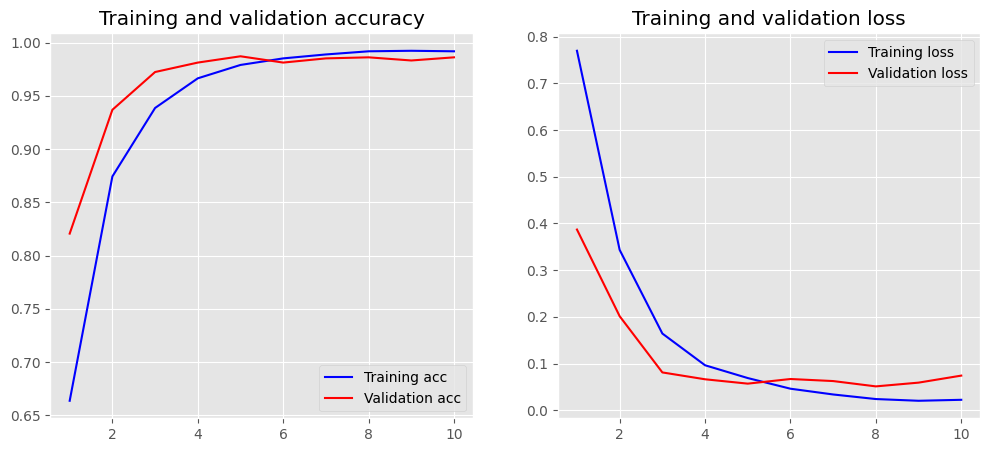

In [123]:
plot_history(history)

In [124]:
def decode_spam(score):
    return 1 if score>0.5 else 0

scores = model.predict(X_test, verbose=1, batch_size=10000)
y_pred_lstm = [decode_spam(score) for score in scores]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       618
           1       0.98      0.98      0.98       397

    accuracy                           0.99      1015
   macro avg       0.99      0.99      0.99      1015
weighted avg       0.99      0.99      0.99      1015


 Accuracy = 98.62%.


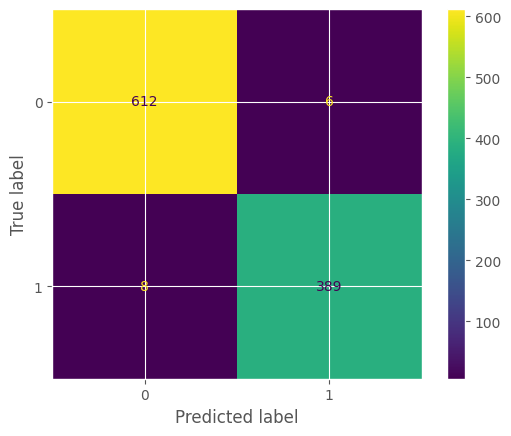

In [125]:
evalmetrics(y_test, y_pred_lstm)

Notes for updates:
- Update to snowball stemmer, seems to be a better version than porter stemmer
    - from nltk.stem import SnowballStemmer 
- Look at the sequence length again for LSTM - maybe around 250-300 is okay? Ask Gabe to run again
- Tidy up preprocessing sections for ML and DL - maybe use same cleaning function for both 
- Quiet warnings on next full run